# Profiling

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dir_path = 'json_output'
filename = 'output_raw_data.json'


In [3]:
def get_average_rating(info_dict):
    if isinstance(info_dict, dict) and 'average' in info_dict:
        return info_dict['average']
    return np.nan  

def extract_dict_value_from_dict_col(info_dict,key,key2):
    if isinstance(info_dict, dict) and key in info_dict:
        level1= info_dict[key]
        if isinstance(level1, dict) and key2 in level1:
            return level1[key2]
    return np.nan  

def extract_dict_value_from_dict_3_safe(info_dict, key, key2, key3):
    if isinstance(info_dict, dict) and key in info_dict:
        level1 = info_dict[key]
        if isinstance(level1, dict) and key2 in level1:
            level2 = level1[key2]
            if isinstance(level2, dict) and key3 in level2:
                return level2[key3]
    return np.nan  

### Lectura de archivo Json

In [4]:
json_file_path = os.path.join('..', dir_path, filename)

try:
    with open(json_file_path, 'r') as f:
        df=pd.read_json(json_file_path)
        print("JSON data loaded successfully")

except FileNotFoundError:
    print(f"Error: JSON file not found at {json_file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

JSON data loaded successfully


### Visualizacion del df

In [5]:
df.head(5)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,_embedded
0,2759405,https://www.tvmaze.com/episodes/2759405/a-seba...,Игорь Джабраилов,5,1.0,regular,2024-01-31,,2024-01-31T00:00:00+00:00,86.0,{'average': None},{'medium': 'https://static.tvmaze.com/uploads/...,None,{'self': {'href': 'https://api.tvmaze.com/epis...,"{'show': {'id': 47865, 'url': 'https://www.tvm..."
1,2743334,https://www.tvmaze.com/episodes/2743334/frendz...,Серия 1,2,1.0,regular,2024-01-31,,2024-01-31T00:00:00+00:00,26.0,{'average': None},None,None,{'self': {'href': 'https://api.tvmaze.com/epis...,"{'show': {'id': 59613, 'url': 'https://www.tvm..."
2,2760318,https://www.tvmaze.com/episodes/2760318/frendz...,Серия 2,2,2.0,regular,2024-01-31,,2024-01-31T00:00:00+00:00,23.0,{'average': None},None,None,{'self': {'href': 'https://api.tvmaze.com/epis...,"{'show': {'id': 59613, 'url': 'https://www.tvm..."
3,2760319,https://www.tvmaze.com/episodes/2760319/frendz...,Серия 3,2,3.0,regular,2024-01-31,,2024-01-31T00:00:00+00:00,25.0,{'average': None},None,None,{'self': {'href': 'https://api.tvmaze.com/epis...,"{'show': {'id': 59613, 'url': 'https://www.tvm..."
4,2693705,https://www.tvmaze.com/episodes/2693705/offlaj...,Серия 9,2,9.0,regular,2024-01-31,,2024-01-31T00:00:00+00:00,NaN,{'average': None},None,None,{'self': {'href': 'https://api.tvmaze.com/epis...,"{'show': {'id': 61191, 'url': 'https://www.tvm..."


### Tipos de datos

In [6]:
df.dtypes

id             int64
url           object
name          object
season         int64
number       float64
type          object
airdate       object
airtime       object
airstamp      object
runtime      float64
rating        object
image         object
summary       object
_links        object
_embedded     object
dtype: object

### Análisis de Datos

Se observa que cada item representa una url para un capítulo en específico de una serie.
Descripción de columnas :
- id: Se encuentra una enumeracion 'unica para cada link [int]
- url : Url de cada capitulo [str]
- name: Nombre del capitulo [str]
- season: temporada [int]
- number: numero de capitulo [int]
- type: tipo de capitulo [str]
- airstamp: datetime  en el que se subio la url [datetime]
- runtime: duracion del capitulo [int]
- rating: calificacion del titulo dentro de un diccionario [dict[int]]
- images: url de las imagenes del capitulo [dict[str]]
- summary: resumen del capitulo [str]
- _links: diccionario con los url referentes al capitulo y la serie nombre de la serie [dict[str]]
- _embedded: diccionario con los url referentes al capitulo y la serie nombre de la serie [dict[str]]

### Valores de datos Int

In [7]:
df.describe()

,id,season,number,runtime
count,4.991000e+03,4991.000000,4953.000000,4432.000000
mean,2.786402e+06,298.974354,18.547749,43.941787
std,1.060120e+05,714.098094,44.527879,43.409693
min,2.391730e+06,1.000000,1.000000,1.000000
25%,2.732670e+06,1.000000,4.000000,18.000000
50%,2.744768e+06,1.000000,8.000000,40.000000
75%,2.797907e+06,6.000000,18.000000,48.000000
max,3.188763e+06,2024.000000,959.000000,300.000000


Se procede a tomar los siguentes datos del df:

In [8]:
col=['id','url','embedded_show_id','embedded_show_name','name','season','number','type','airstamp','runtime','average_rating','embedded_show_type','embedded_show_language','embedded_show_genres','embedded_show_status','showed_in']

### Transformacion de datos

Transformacion del tipo de dato del numero del episodio

In [9]:
df['number'] = df['number'].fillna(0).astype(int)

Extracción del dato de rating que se encuentr dentro de un diccionario con el valor Average

In [10]:
df['average_rating'] = df['rating'].apply(get_average_rating)

Extraccion de datos del campo _embedded que se encuentran dentro de un mismo diccionario


In [11]:

df['embedded_show_id']= df['_embedded'].apply(lambda x: extract_dict_value_from_dict_col(x, 'show','id'))
df['embedded_show_name']= df['_embedded'].apply(lambda x: extract_dict_value_from_dict_col(x, 'show','name'))
df['embedded_show_type']= df['_embedded'].apply(lambda x: extract_dict_value_from_dict_col(x, 'show','type'))
df['embedded_show_language']= df['_embedded'].apply(lambda x: extract_dict_value_from_dict_col(x, 'show','language'))
df['embedded_show_genres']= df['_embedded'].apply(lambda x: extract_dict_value_from_dict_col(x, 'show','genres'))#list
df['embedded_show_status']= df['_embedded'].apply(lambda x: extract_dict_value_from_dict_col(x, 'show','status'))
df['embedded_show_network']= df['_embedded'].apply(lambda x: extract_dict_value_from_dict_3_safe(x, 'show','network','name'))#dict id network
df['embedded_show_webChannel']= df['_embedded'].apply(lambda x: extract_dict_value_from_dict_3_safe(x, 'show','webChannel','name'))#dict id name country


Unión de columnas embedded_show_network y embedded_show_webChannel en una columna showed_in

In [12]:
df['showed_in']=df['embedded_show_network'].fillna(df['embedded_show_webChannel'])

Cambio de nombre de las columnas en el df

In [13]:
re_named_col=['episode_id','url','show_id','show_name','episode_name','season_n','episode_n','type_ep','airstamp','runtime','average_rating','show_type','show_language','show_genres','show_status','showed_in']
dfo=df[col]
dfo.columns=re_named_col

## Exploracion de datos

Visualización de datos, Datos nulos y conteo

In [14]:
dfo.head(5)

,episode_id,url,show_id,show_name,episode_name,season_n,episode_n,type_ep,airstamp,runtime,average_rating,show_type,show_language,show_genres,show_status,showed_in
0,2759405,https://www.tvmaze.com/episodes/2759405/a-seba...,47865,Я СЕБЯ ЗНАЮ!,Игорь Джабраилов,5,1,regular,2024-01-31T00:00:00+00:00,86.0,NaN,Talk Show,Russian,[Comedy],Running,VK Видео
1,2743334,https://www.tvmaze.com/episodes/2743334/frendz...,59613,Френдзона,Серия 1,2,1,regular,2024-01-31T00:00:00+00:00,26.0,NaN,Scripted,Russian,[],Running,Start
2,2760318,https://www.tvmaze.com/episodes/2760318/frendz...,59613,Френдзона,Серия 2,2,2,regular,2024-01-31T00:00:00+00:00,23.0,NaN,Scripted,Russian,[],Running,Start
3,2760319,https://www.tvmaze.com/episodes/2760319/frendz...,59613,Френдзона,Серия 3,2,3,regular,2024-01-31T00:00:00+00:00,25.0,NaN,Scripted,Russian,[],Running,Start
4,2693705,https://www.tvmaze.com/episodes/2693705/offlaj...,61191,Оффлайн,Серия 9,2,9,regular,2024-01-31T00:00:00+00:00,NaN,NaN,Scripted,Russian,"[Drama, Crime, Thriller]",Ended,Okko


In [15]:
dfo.isnull().sum()

episode_id           0
url                  0
show_id              0
show_name            0
episode_name         0
season_n             0
episode_n            0
type_ep              0
airstamp             0
runtime            559
average_rating    4627
show_type            0
show_language      338
show_genres          0
show_status          0
showed_in            0
dtype: int64

In [16]:
dfo.count()

episode_id        4991
url               4991
show_id           4991
show_name         4991
episode_name      4991
season_n          4991
episode_n         4991
type_ep           4991
airstamp          4991
runtime           4432
average_rating     364
show_type         4991
show_language     4653
show_genres       4991
show_status       4991
showed_in         4991
dtype: int64

#### Pie Chart para plataformas de lanzamiento (top 15)

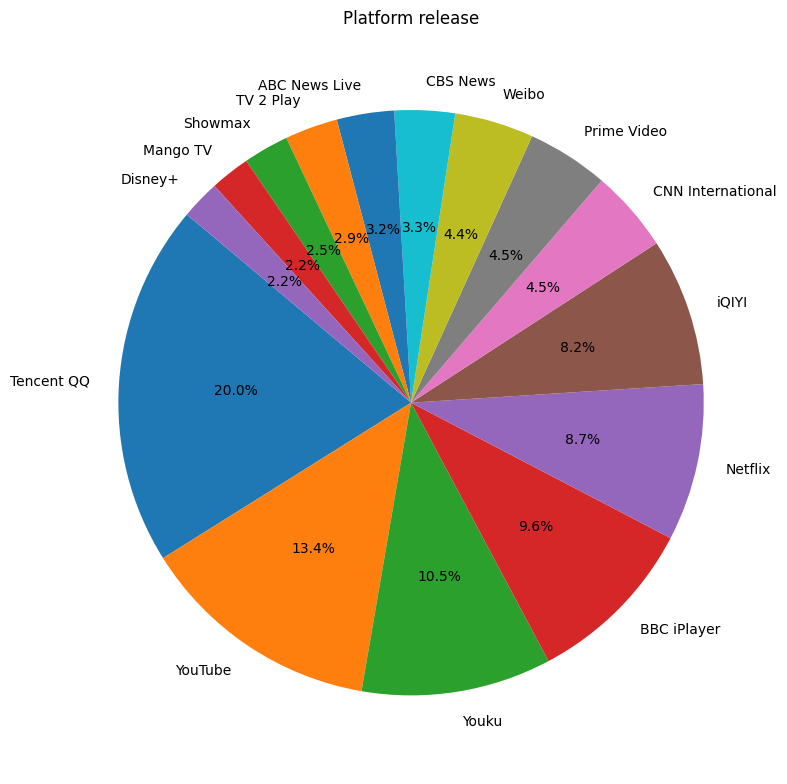

In [17]:

genre_counts = dfo['showed_in'].value_counts().head(15)

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Platform release')
plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Bar Chart genero de la serie

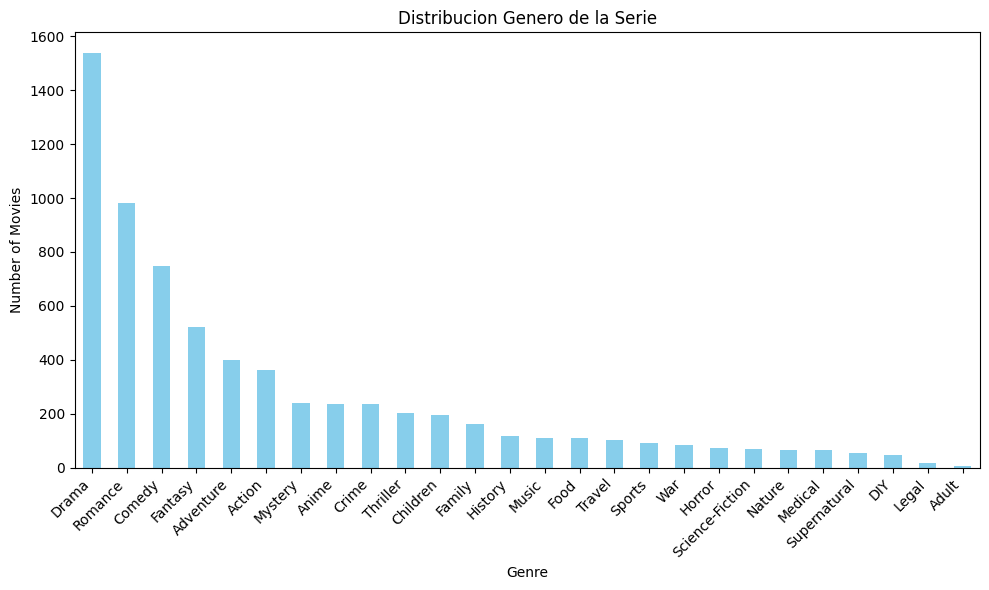

In [18]:
exploded_genres = dfo.explode('show_genres')

genre_counts = exploded_genres['show_genres'].value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribucion Genero de la Serie')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Bar Chart Idioma

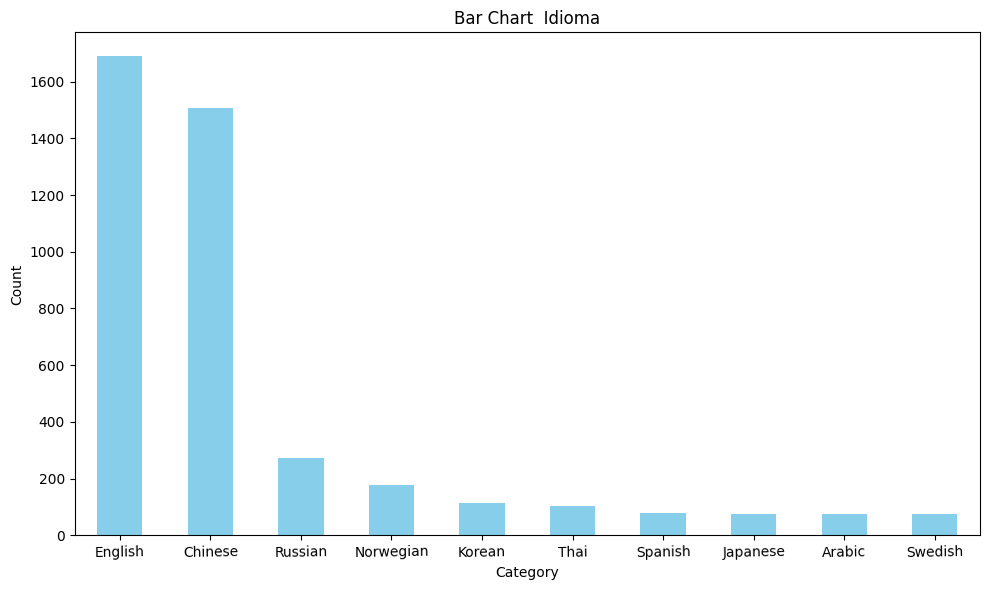

In [19]:
value_counts = dfo['show_language'].value_counts().head(10)

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart  Idioma')
plt.xticks(rotation=1)  
plt.tight_layout()      
plt.show()

In [20]:
dfo.to_parquet('output_data.parquet',compression='snappy')

In [21]:
dir_path = 'data'
filename = 'output_data.parquet'

output_path = os.path.join('..', dir_path, filename)

try:
    dfo.to_parquet(output_path, compression='snappy') 
    dfo.to_csv('output_data.csv')
    print(f"DataFrame saved successfully to: {output_path}")

except Exception as e:
    print(f"An error occurred while saving the DataFrame: {e}")

DataFrame saved successfully to: ..\data\output_data.parquet
